# Using statistics in agile estimation #

In Scrum, and in general in any Agile process, starting with Extreme Programming, the development is split into fixed-length iterations or sprints. Before the beginning of each sprint, the team is doing sprints planning and allocates the work for the sprint based on the priority of user stories. The question is, how many stories the team can complete in one iteration? 

The unit of work started from "ideal hours" in Extreme Programming, which is different from the real hours. Ideal hours is the number of hours available to the team to actually do work. Moreover, the estimate was multiplied by the load factor, initially set to 3. 

This fairly complex models seemed ineffective and was replaced to story points. They are abstract measure of complexity of the user story, and the values are assigned based on the similar user stories, done in the past, and a ceremony called "planning poker". The number of story points the team can do within one iteration is called project velocity. It is measured based on the "Yesterday's weather" rule. 

The number of story points completed varies in the past iterations, so it is natural to use statistical methods to model the project velocity. Initially I started using Normal distribution once to estimate a story point duration, but then I noticed, that for some developers the variance was so high, that the left tail would go into the negative territory (the task would take negative time to complete!). So I have to choose a distribution that has support $x \in [0, \infty]$.

I can choose a very popular Gamma distribution, but a better choice is [Log-Normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution).

$$ p(x | \mu,\sigma) = \frac{1}{x \sigma \sqrt{2 \pi}} e^{-\frac{(\ln x - \mu)^2}{2 \sigma^2}}$$

The best property of this distribution is that the inverse distribution is also a Log-normal distribution with the same parameter $\sigma$ and a reversed parameter $-\mu$. This means, that if the story duration is a log-normal distribution, then the project velocity is also a log-normal distribution!

Let's take an artificial example (that, however, based on my experience) that after five iterations we have the following number of story points completed: 14, 12, 7, 14, 13:

In [13]:
import numpy as np
from scipy.stats import lognorm
data=np.array([14, 12,  7, 14, 13])

We will use function `fit()` to infer the most likely parameters of the distribution

In [14]:
shape, loc, scale = lognorm.fit(data, floc=0)
fitted = lognorm(shape, loc, scale)
print(f'Mean: {fitted.mean()}')
print(f'Median {fitted.median()}')
print(f'Standard deviation {fitted.std()}')

Mean: 12.046405137951629
Median 11.643812098634315
Standard deviation 3.195066701596986


What you can see that, unlike the Normal distribution, mean here is not equal to median. The median indicates that there is 50% chance we will be able to complete 12 story points in an iteration.  Is this what the management is asking for? Probably not. They want a commitment, or at least, 95% confidence. We can also easily get that:

In [15]:
print(f'95% confidence: {fitted.ppf(0.05)}')

95% confidence: 7.582961342994959


This means, that we can report to the management, that with 95% confidence we can complete 7 story points within one iteration.

The project velocity may have a systematic error if the individual developers' velocity is drastically different. A good Agile project not only tracks the team velocity, but also developer velocity, and adjust the former based on the latter.

The project velocity may also depend on other factors. The developers are getting better in estimating the stories, the team is becoming faster, so it may not makes sense to use all historical data equally, but use techniques lime moving average or exponential moving average.

Finally, let's plot the graph:

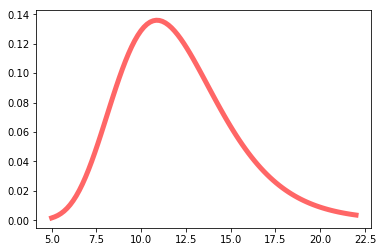

In [16]:
#Let's plot it
%matplotlib inline
import matplotlib.pyplot as plt
def plot_dist(frozen):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(5, 22, 100)
    ax.plot(x, frozen.pdf(x), 'r-', lw=5, alpha=0.6, label='lognorm pdf')
plot_dist(fitted);

We can see that there are long tails in this distribution, either indicating a team of junior developers, or a team that is struggling with unknown technology. Let's use the data from a different team of more senior developers, that are also more familiar with the technology:

In [17]:
data1=np.array([10, 11,  12, 10, 11, 12])
shape1, loc1, scale1 = lognorm.fit(data1, floc=0)
fitted1 = lognorm(shape1, loc1, scale1)
print(f'Mean: {fitted1.mean()}')
print(f'Standard deviation {fitted1.std()}')
print(f'Median {fitted1.median()}')
print(f'95% confidence: {fitted1.ppf(0.05)}')

Mean: 11.000080762503776
Standard deviation 0.8202233434986027
Median 10.969627629371379
95% confidence: 9.705099227490399


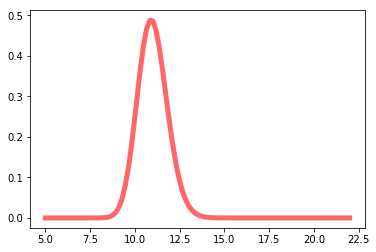

In [18]:
plot_dist(fitted1);

We see, that even though the velocity of this team is lower, than of the first team, if the manager asks you for 95% confidence, you can pick the second team, because it can reliably do more story points in the iteration.